# 리그오브레전드 소환사 이름으로 티어 예측하기

## 필요 라이브러리 설치 및 불러오기

hgtk : https://github.com/bluedisk/hangul-toolkit

In [2]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for hgtk: filename=hgtk-0.1.3-py2.py3-none-any.whl size=6689 sha256=6426e62b4252f6814c541bcaad98261ff3b9e4353bd6945d1a21dd0ebf2b353e
  Stored in directory: /root/.cache/pip/wheels/a6/e9/bc/524beb5222b11aa439a23a07be5bd8a559d266153103c37979
Successfully built hgtk


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import random
import hgtk
import urllib

## 데이터 내려받기 및 티어 나누기

In [8]:
urllib.request.urlretrieve("https://media.githubusercontent.com/media/oneonlee/Prediction-of-LoL-Tier-with-Summoner-Name/main/data/lol_raw_data.csv", filename="lol_raw_data.csv")

('lol_raw_data.csv', <http.client.HTTPMessage at 0x7f3aa146a7d0>)

In [9]:
lol_raw_data = pd.read_csv("lol_raw_data.csv")

In [10]:
lol_raw_data

,ranking,nickname,tier
0,1,JUGKlNG,challenger
1,2,viper3,challenger
2,3,KT Way,challenger
3,4,SMB heixiaohu,challenger
4,5,냥똥벌레,challenger
...,...,...,...
3718152,3899896,qwer1234q,iron
3718153,3899897,오마이나니,iron
3718154,3899898,마카롱래샤샤,iron
3718155,3899899,juste cause,iron


## EDA (Exploratory Data Analysis, 탐색적 데이터 분석) 

`lol_raw_data`의 결측치 확인

In [ ]:
lol_raw_data.isnull().sum()

ranking           0
nickname          0
tier              0
most_champion1    0
most_champion2    0
most_champion3    0
level             0
dtype: int64

In [ ]:
lol_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718157 entries, 0 to 3718156
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ranking         int64 
 1   nickname        object
 2   tier            object
 3   most_champion1  object
 4   most_champion2  object
 5   most_champion3  object
 6   level           int64 
dtypes: int64(2), object(5)
memory usage: 198.6+ MB


소환사 이름의 최대 길이 :16
소환사 이름의 평균 길이 :6.427814909375801



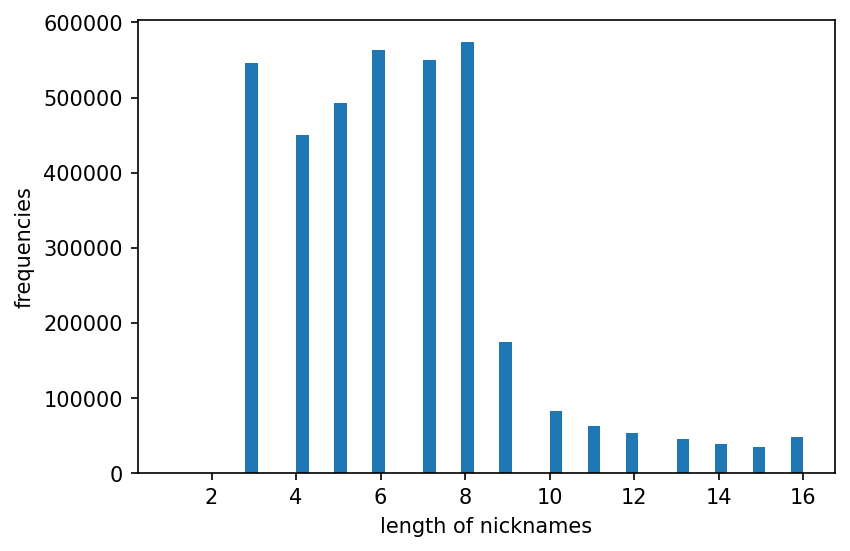

In [ ]:
print('소환사 이름의 최대 길이 :{}'.format(max(len(sample) for sample in lol_raw_data['nickname'])))
print('소환사 이름의 평균 길이 :{}'.format(sum(map(len, lol_raw_data['nickname']))/len(lol_raw_data['nickname'])))
print()

plt.figure(dpi=150)
plt.hist([len(sample) for sample in lol_raw_data['nickname']], bins=50)
plt.xlabel('length of nicknames')
plt.ylabel('frequencies')
plt.show()

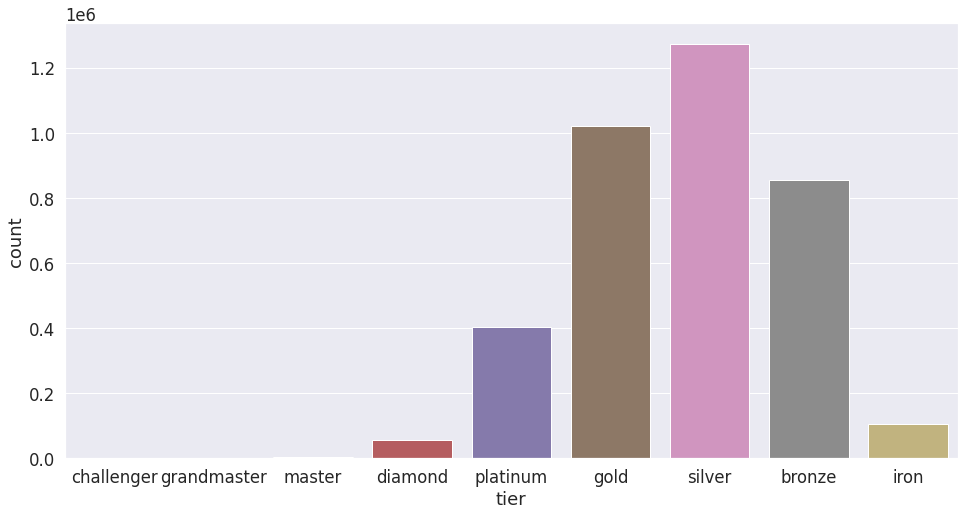

In [ ]:
sns.set(font_scale = 1.5)
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(16,8)
sns.countplot(x = lol_raw_data['tier'])

In [ ]:
unique_elements, counts_elements = np.unique(lol_raw_data['tier'], return_counts=True)

for i in range(len(unique_elements)):
  print(f"{unique_elements[i]} tier : {counts_elements[i]}")

bronze tier : 854653
challenger tier : 296
diamond tier : 57195
gold tier : 1020424
grandmaster tier : 681
iron tier : 104320
master tier : 3806
platinum tier : 404496
silver tier : 1272286


'master' 이상의 티어는 하나로 묶어서 다시 살펴보기

In [ ]:
lol_edited_data = lol_raw_data.replace({'tier' : 'challenger'}, 'above_master')
lol_edited_data = lol_edited_data.replace({'tier' : 'grandmaster'}, 'above_master') 
lol_edited_data = lol_edited_data.replace({'tier' : 'master'}, 'above_master') 

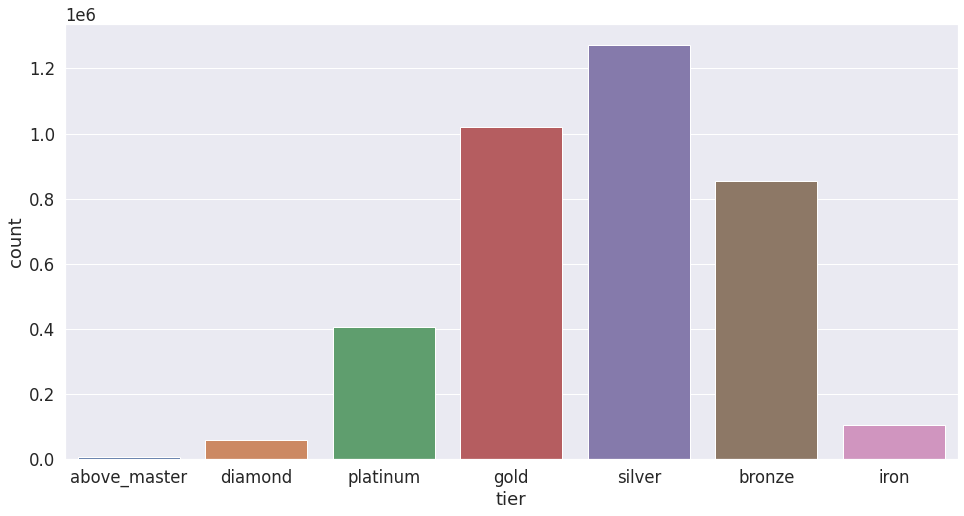

In [ ]:
sns.set(font_scale = 1.5)
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(16,8)
sns.countplot(x = lol_edited_data['tier'])

In [ ]:
edited_tier_list, counts_elements = np.unique(lol_edited_data['tier'], return_counts=True)

for i in range(len(edited_tier_list)):
  print(f"{edited_tier_list[i]} tier : {counts_elements[i]}")

above_master tier : 4783
bronze tier : 854653
diamond tier : 57195
gold tier : 1020424
iron tier : 104320
platinum tier : 404496
silver tier : 1272286


## Over Sampling 수행

In [ ]:
minimum = min(counts_elements)
min_idx = np.where(counts_elements==minimum)
least_tier = edited_tier_list[min_idx][0]

In [ ]:
over_sampled_data = lol_edited_data[lol_edited_data['tier'] == least_tier]

In [ ]:
over_sampled_data1 = over_sampled_data.copy()
for i in range(len(over_sampled_data1)):
    over_sampled_data1['nickname'][i] = over_sampled_data1['nickname'][i][1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
over_sampled_data2 = over_sampled_data.copy()
for i in range(len(over_sampled_data2)):
    over_sampled_data2['nickname'][i] = over_sampled_data2['nickname'][i][:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
over_sampled_data = pd.concat([over_sampled_data, over_sampled_data1])
over_sampled_data = pd.concat([over_sampled_data, over_sampled_data2])

In [ ]:
edited_tier_list

array(['above_master', 'bronze', 'diamond', 'gold', 'iron', 'platinum',
       'silver'], dtype=object)

In [ ]:
maximum = len(over_sampled_data)
edited_tier_list = np.delete(edited_tier_list, min_idx)

for tier in edited_tier_list:
  over_sampled_data = pd.concat([over_sampled_data, lol_edited_data[lol_edited_data['tier'] == tier].sample(maximum)])

In [ ]:
over_sampled_data

,ranking,nickname,tier,most_champion1,most_champion2,most_champion3,level
0,1,JUGKlNG,above_master,니달리,아크샨,리 신,372
1,2,viper3,above_master,이즈리얼,아펠리오스,칼리스타,499
2,3,KT Way,above_master,노틸러스,레나타 글라스크,라칸,473
3,4,SMB heixiaohu,above_master,비에고,리 신,그레이브즈,106
4,5,냥똥벌레,above_master,라이즈,요네,빅토르,453
...,...,...,...,...,...,...,...
2118787,2205560,이달의 원딜,silver,잭스,니코,사미라,371
1809630,1882194,전판에똥싼놈,silver,아트록스,우르곳,하이머딩거,214
2482043,2590755,섹시한 닭다리,silver,카르마,뽀삐,에코,116
1688743,1755781,짐승같은새끼,silver,벡스,럭스,애니비아,141


In [ ]:
X_data = over_sampled_data['nickname']
y_data = over_sampled_data['tier']

## LSTM으로 티어 예측하기

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
vocab_size = 1000
max_len = 16

티어의 정수 인코딩

In [ ]:
y_data = y_data.replace('above_master', 0)
y_data = y_data.replace('diamond', 1)
y_data = y_data.replace('platinum', 2)
y_data = y_data.replace('gold', 3)
y_data = y_data.replace('silver', 4)
y_data = y_data.replace('bronze', 5)
y_data = y_data.replace('iron', 6)

### 자음 모음 단위 토큰화

In [ ]:
def word_to_jamo(token):
  def to_special_token(jamo):
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char
    
  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [ ]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0
  
  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']
  
  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:  
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

In [ ]:
max_len = 16*3

In [ ]:
characters_data = {}
jamorized_X_data = []

for X in tqdm(X_data):
    # 자음 모음 단위 토큰화
    jamo_X = list(word_to_jamo(X))
    result = []

    for jamo in jamo_X: 
        result.append(jamo)
        if jamo not in characters_data:
            characters_data[jamo] = 0 
        characters_data[jamo] += 1
    jamorized_X_data.append(result) 


print('단어 집합 :', characters_data)

data_vocab_sorted = sorted(characters_data.items(), key = lambda x:x[1], reverse = True)
print(data_vocab_sorted)

100%|██████████| 100443/100443 [00:03<00:00, 26628.69it/s]

단어 집합 : {'J': 1248, 'U': 1011, 'G': 2250, 'K': 2112, 'l': 10907, 'N': 2276, 'v': 2040, 'i': 12317, 'p': 2906, 'e': 14228, 'r': 8094, '3': 1910, 'T': 2619, ' ': 39555, 'W': 1013, 'a': 15284, 'y': 4373, 'S': 3124, 'M': 2110, 'B': 1521, 'h': 5268, 'x': 1712, 'o': 12218, 'u': 6299, 'ㄴ': 76825, 'ㅑ': 5209, 'ㅇ': 113414, 'ㄸ': 4113, 'ㅗ': 41834, 'ㅂ': 26789, 'ㅓ': 33151, 'ㄹ': 55756, 'ㅔ': 14609, '-': 204437, 'f': 2176, 't': 6072, 'A': 3113, 'k': 4020, 'R': 2129, 'H': 1678, '9': 1669, '4': 1391, '1': 6155, '7': 1416, 'ㅅ': 39245, 'ㅛ': 5176, 'ㄷ': 25643, 'ㅏ': 86638, 'ㅣ': 69638, 'ㅊ': 11921, 'ㄱ': 56871, 'ㅜ': 32570, 'ㅡ': 33006, 'n': 11610, 'ㅘ': 5665, 'ㅋ': 9023, 'ㄲ': 5278, 'ㅁ': 44012, 'D': 2395, 'w': 2888, 'm': 4564, 's': 7771, 'Q': 372, 'Z': 641, 'I': 5167, 'c': 3707, 'ㅐ': 20754, 'ㅎ': 23741, 'ㅍ': 10146, 'ㅌ': 11009, 'ㅖ': 1771, 'ㅈ': 35050, '5': 1334, '2': 3838, 'C': 1823, 'X': 706, 'P': 1838, 'z': 2181, 'b': 2560, '0': 3827, '6': 1049, 'V': 721, 'L': 2160, 'O': 2453, 'g': 4721, 'ㅕ': 15091, 'd': 5228, '8': 1

In [ ]:
data_word_to_index = {}
i = 0
for (word, frequency) in data_vocab_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        data_word_to_index[word] = i

print(data_word_to_index)

data_word_to_index['OOV'] = len(data_word_to_index) + 1
print(data_word_to_index)

{'-': 1, 'ㅇ': 2, 'ㅏ': 3, 'ㄴ': 4, 'ㅣ': 5, 'ㄱ': 6, 'ㄹ': 7, 'ㅁ': 8, 'ㅗ': 9, ' ': 10, 'ㅅ': 11, 'ㅈ': 12, 'ㅓ': 13, 'ㅡ': 14, 'ㅜ': 15, 'ㅂ': 16, 'ㄷ': 17, 'ㅎ': 18, 'ㅐ': 19, 'a': 20, 'ㅕ': 21, 'ㅔ': 22, 'e': 23, 'i': 24, 'o': 25, 'ㅊ': 26, 'n': 27, 'ㅌ': 28, 'l': 29, 'ㅍ': 30, 'ㅋ': 31, 'r': 32, 's': 33, 'u': 34, '1': 35, 't': 36, 'ㅘ': 37, 'ㄲ': 38, 'h': 39, 'd': 40, 'ㅑ': 41, 'ㅛ': 42, 'I': 43, 'ㅠ': 44, 'g': 45, 'm': 46, 'y': 47, 'ㄸ': 48, 'k': 49, 'ㅝ': 50, '2': 51, '0': 52, 'c': 53, 'ㅆ': 54, 'ㅃ': 55, 'ㅉ': 56, 'ㅢ': 57, 'S': 58, 'A': 59, 'p': 60, 'w': 61, 'ㅟ': 62, 'T': 63, 'b': 64, 'O': 65, 'D': 66, 'E': 67, 'N': 68, 'G': 69, 'z': 70, 'f': 71, 'L': 72, 'R': 73, 'K': 74, 'M': 75, 'v': 76, '3': 77, 'ㅚ': 78, 'P': 79, 'C': 80, 'ㅖ': 81, 'x': 82, 'H': 83, '9': 84, 'j': 85, 'B': 86, '7': 87, '4': 88, '5': 89, '8': 90, 'J': 91, 'F': 92, '6': 93, 'Y': 94, 'W': 95, 'U': 96, 'q': 97, 'V': 98, 'X': 99, 'ㅄ': 100, 'Z': 101, 'ㅙ': 102, 'ㄺ': 103, 'ㄶ': 104, 'Q': 105, 'ㅞ': 106, 'ㅀ': 107, 'ㄻ': 108, 'ㅒ': 109, 'ㄼ': 110, 'ㄾ': 11

In [ ]:
encoded_X_data = []
for jamorized_X in tqdm(jamorized_X_data):
    encoded_sentence = []
    for jamo in jamorized_X:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(data_word_to_index[jamo])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(data_word_to_index['OOV'])
    encoded_X_data.append(encoded_sentence)

100%|██████████| 100443/100443 [00:00<00:00, 183273.37it/s]


In [ ]:
encoded_X_data = pad_sequences(encoded_X_data, maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X_data, y_data, test_size=0.33, random_state=815, stratify=y_data)

print(f"전체 data의 개수 : {len(encoded_X_data)}")
print(f"train data의 개수 : {len(X_train)}")
print(f"test data의 개수 : {len(X_test)}")

전체 data의 개수 : 100443
train data의 개수 : 67296
test data의 개수 : 33147


#### LSTM ver.1 - *0.21945*

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_lstm_128.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
525/526 [============================>.] - ETA: 0s - loss: 1.9089 - acc: 0.1927
Epoch 1: val_acc improved from -inf to 0.19848, saving model to jamo_best_model_lstm_128.h5
526/526 [==============================] - 7s 9ms/step - loss: 1.9088 - acc: 0.1928 - val_loss: 1.9028 - val_acc: 0.1985
Epoch 2/30
520/526 [============================>.] - ETA: 0s - loss: 1.8847 - acc: 0.2064
Epoch 2: val_acc improved from 0.19848 to 0.20620, saving model to jamo_best_model_lstm_128.h5
526/526 [==============================] - 4s 8ms/step - loss: 1.8845 - acc: 0.2066 - val_loss: 1.8735 - val_acc: 0.2062
Epoch 3/30
523/526 [============================>.] - ETA: 0s - loss: 1.8702 - acc: 0.2124
Epoch 3: val_acc improved from 0.20620 to 0.21356, saving model to jamo_best_model_lstm_128.h5
526/526 [==============================] - 6s 11ms/step - loss: 1.8701 - acc: 0.2123 - val_loss: 1.8686 - val_acc: 0.2136
Epoch 4/30
522/526 [============================>.] - ETA: 0s - loss: 1.8634 - ac

#### LSTM ver.2 - *0.21972*

In [ ]:
embedding_dim = 64
hidden_units = 64
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_lstm_64.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
1051/1052 [============================>.] - ETA: 0s - loss: 1.9101 - acc: 0.1961
Epoch 1: val_acc improved from -inf to 0.20062, saving model to jamo_best_model_lstm_64.h5
1052/1052 [==============================] - 9s 7ms/step - loss: 1.9101 - acc: 0.1961 - val_loss: 1.8976 - val_acc: 0.2006
Epoch 2/30
1047/1052 [============================>.] - ETA: 0s - loss: 1.8850 - acc: 0.2086
Epoch 2: val_acc improved from 0.20062 to 0.21097, saving model to jamo_best_model_lstm_64.h5
1052/1052 [==============================] - 8s 8ms/step - loss: 1.8850 - acc: 0.2087 - val_loss: 1.8768 - val_acc: 0.2110
Epoch 3/30
1052/1052 [==============================] - ETA: 0s - loss: 1.8708 - acc: 0.2126
Epoch 3: val_acc improved from 0.21097 to 0.21335, saving model to jamo_best_model_lstm_64.h5
1052/1052 [==============================] - 8s 8ms/step - loss: 1.8708 - acc: 0.2126 - val_loss: 1.8672 - val_acc: 0.2134
Epoch 4/30
1049/1052 [============================>.] - ETA: 0s - loss: 1

#### Bi-LSTM ver.1 *0.22147*

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_bilstm_128.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
525/526 [============================>.] - ETA: 0s - loss: 1.9105 - acc: 0.1904
Epoch 1: val_acc improved from -inf to 0.19736, saving model to jamo_best_model_bilstm_128.h5
526/526 [==============================] - 10s 14ms/step - loss: 1.9105 - acc: 0.1904 - val_loss: 1.8946 - val_acc: 0.1974
Epoch 2/30
523/526 [============================>.] - ETA: 0s - loss: 1.8862 - acc: 0.2055
Epoch 2: val_acc improved from 0.19736 to 0.20825, saving model to jamo_best_model_bilstm_128.h5
526/526 [==============================] - 7s 13ms/step - loss: 1.8861 - acc: 0.2057 - val_loss: 1.8758 - val_acc: 0.2083
Epoch 3/30
522/526 [============================>.] - ETA: 0s - loss: 1.8705 - acc: 0.2127
Epoch 3: val_acc improved from 0.20825 to 0.21390, saving model to jamo_best_model_bilstm_128.h5
526/526 [==============================] - 8s 15ms/step - loss: 1.8704 - acc: 0.2127 - val_loss: 1.8709 - val_acc: 0.2139
Epoch 4/30
525/526 [============================>.] - ETA: 0s - loss: 1.

#### Bi-LSTM ver.2 *0.22132*

In [ ]:
embedding_dim = 64
hidden_units = 64
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_bilstm_64.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
1049/1052 [============================>.] - ETA: 0s - loss: 1.9105 - acc: 0.1917
Epoch 1: val_acc improved from -inf to 0.20020, saving model to jamo_best_model_bilstm_64.h5
1052/1052 [==============================] - 15s 11ms/step - loss: 1.9105 - acc: 0.1917 - val_loss: 1.8948 - val_acc: 0.2002
Epoch 2/30
1050/1052 [============================>.] - ETA: 0s - loss: 1.8845 - acc: 0.2053
Epoch 2: val_acc improved from 0.20020 to 0.21157, saving model to jamo_best_model_bilstm_64.h5
1052/1052 [==============================] - 11s 10ms/step - loss: 1.8846 - acc: 0.2052 - val_loss: 1.8779 - val_acc: 0.2116
Epoch 3/30
1052/1052 [==============================] - ETA: 0s - loss: 1.8714 - acc: 0.2147
Epoch 3: val_acc did not improve from 0.21157
1052/1052 [==============================] - 11s 10ms/step - loss: 1.8714 - acc: 0.2147 - val_loss: 1.8988 - val_acc: 0.2013
Epoch 4/30
1046/1052 [============================>.] - ETA: 0s - loss: 1.8650 - acc: 0.2160
Epoch 4: val_acc i

#### GRU ver.1 *0.22105*

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_gru_128.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
519/526 [============================>.] - ETA: 0s - loss: 1.9092 - acc: 0.1932
Epoch 1: val_acc improved from -inf to 0.19830, saving model to jamo_best_model_gru_128.h5
526/526 [==============================] - 6s 9ms/step - loss: 1.9090 - acc: 0.1932 - val_loss: 1.8964 - val_acc: 0.1983
Epoch 2/30
521/526 [============================>.] - ETA: 0s - loss: 1.8863 - acc: 0.2056
Epoch 2: val_acc improved from 0.19830 to 0.21106, saving model to jamo_best_model_gru_128.h5
526/526 [==============================] - 4s 8ms/step - loss: 1.8864 - acc: 0.2054 - val_loss: 1.8777 - val_acc: 0.2111
Epoch 3/30
521/526 [============================>.] - ETA: 0s - loss: 1.8740 - acc: 0.2111
Epoch 3: val_acc did not improve from 0.21106
526/526 [==============================] - 4s 8ms/step - loss: 1.8738 - acc: 0.2111 - val_loss: 1.8721 - val_acc: 0.2105
Epoch 4/30
523/526 [============================>.] - ETA: 0s - loss: 1.8659 - acc: 0.2156
Epoch 4: val_acc did not improve from 0.21

#### GRU ver.2 *0.21993*

In [ ]:
embedding_dim = 64
hidden_units = 64
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_gru_64.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
1044/1052 [============================>.] - ETA: 0s - loss: 1.9079 - acc: 0.1918
Epoch 1: val_acc improved from -inf to 0.19941, saving model to jamo_best_model_gru_64.h5
1052/1052 [==============================] - 10s 8ms/step - loss: 1.9080 - acc: 0.1919 - val_loss: 1.8963 - val_acc: 0.1994
Epoch 2/30
1045/1052 [============================>.] - ETA: 0s - loss: 1.8848 - acc: 0.2065
Epoch 2: val_acc improved from 0.19941 to 0.20331, saving model to jamo_best_model_gru_64.h5
1052/1052 [==============================] - 7s 7ms/step - loss: 1.8849 - acc: 0.2065 - val_loss: 1.8838 - val_acc: 0.2033
Epoch 3/30
1052/1052 [==============================] - ETA: 0s - loss: 1.8747 - acc: 0.2121
Epoch 3: val_acc improved from 0.20331 to 0.20973, saving model to jamo_best_model_gru_64.h5
1052/1052 [==============================] - 7s 7ms/step - loss: 1.8747 - acc: 0.2121 - val_loss: 1.8750 - val_acc: 0.2097
Epoch 4/30
1051/1052 [============================>.] - ETA: 0s - loss: 1.8

#### Bi-GRU ver.1 *0.22192*

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(GRU(hidden_units)))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_biGRU_128.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
525/526 [============================>.] - ETA: 0s - loss: 1.9104 - acc: 0.1918
Epoch 1: val_acc improved from -inf to 0.20116, saving model to jamo_best_model_biGRU_128.h5
526/526 [==============================] - 10s 14ms/step - loss: 1.9104 - acc: 0.1918 - val_loss: 1.8930 - val_acc: 0.2012
Epoch 2/30
524/526 [============================>.] - ETA: 0s - loss: 1.8874 - acc: 0.2070
Epoch 2: val_acc improved from 0.20116 to 0.20714, saving model to jamo_best_model_biGRU_128.h5
526/526 [==============================] - 6s 12ms/step - loss: 1.8874 - acc: 0.2069 - val_loss: 1.8828 - val_acc: 0.2071
Epoch 3/30
522/526 [============================>.] - ETA: 0s - loss: 1.8731 - acc: 0.2111
Epoch 3: val_acc improved from 0.20714 to 0.20925, saving model to jamo_best_model_biGRU_128.h5
526/526 [==============================] - 6s 12ms/step - loss: 1.8734 - acc: 0.2109 - val_loss: 1.8748 - val_acc: 0.2092
Epoch 4/30
523/526 [============================>.] - ETA: 0s - loss: 1.864

#### Bi-GRU ver.2 *0.22210*

In [ ]:
embedding_dim = 64
hidden_units = 64
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(GRU(hidden_units)))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo_best_model_biGRU_64.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, epochs=30, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
1047/1052 [============================>.] - ETA: 0s - loss: 1.9096 - acc: 0.1914
Epoch 1: val_acc improved from -inf to 0.19613, saving model to jamo_best_model_biGRU_64.h5
1052/1052 [==============================] - 14s 10ms/step - loss: 1.9094 - acc: 0.1915 - val_loss: 1.8979 - val_acc: 0.1961
Epoch 2/30
1050/1052 [============================>.] - ETA: 0s - loss: 1.8865 - acc: 0.2045
Epoch 2: val_acc improved from 0.19613 to 0.20629, saving model to jamo_best_model_biGRU_64.h5
1052/1052 [==============================] - 10s 9ms/step - loss: 1.8865 - acc: 0.2044 - val_loss: 1.8790 - val_acc: 0.2063
Epoch 3/30
1052/1052 [==============================] - ETA: 0s - loss: 1.8740 - acc: 0.2111
Epoch 3: val_acc improved from 0.20629 to 0.21260, saving model to jamo_best_model_biGRU_64.h5
1052/1052 [==============================] - 10s 9ms/step - loss: 1.8740 - acc: 0.2111 - val_loss: 1.8729 - val_acc: 0.2126
Epoch 4/30
1051/1052 [============================>.] - ETA: 0s - 

### 모델 predict

가장 성능이 좋은 model을 `load` 한다.

In [ ]:
model = load_model('jamo_best_model_biGRU_64.h5')

In [ ]:
# data_word_to_index = {'-': 1, 'ㅇ': 2, 'ㅏ': 3, 'ㄴ': 4, 'ㅣ': 5, 'ㄱ': 6, 'ㄹ': 7, 'ㅁ': 8, 'ㅗ': 9, ' ': 10, 'ㅅ': 11, 'ㅈ': 12, 'ㅓ': 13, 'ㅡ': 14, 'ㅜ': 15, 'ㅂ': 16, 'ㄷ': 17, 'ㅎ': 18, 'ㅐ': 19, 'a': 20, 'ㅕ': 21, 'ㅔ': 22, 'e': 23, 'i': 24, 'o': 25, 'ㅊ': 26, 'n': 27, 'ㅌ': 28, 'l': 29, 'ㅍ': 30, 'ㅋ': 31, 'r': 32, 's': 33, 'u': 34, '1': 35, 't': 36, 'ㅘ': 37, 'ㄲ': 38, 'h': 39, 'd': 40, 'ㅑ': 41, 'ㅛ': 42, 'I': 43, 'ㅠ': 44, 'g': 45, 'm': 46, 'y': 47, 'ㄸ': 48, 'k': 49, 'ㅝ': 50, '2': 51, '0': 52, 'c': 53, 'ㅆ': 54, 'ㅃ': 55, 'ㅉ': 56, 'ㅢ': 57, 'S': 58, 'A': 59, 'p': 60, 'w': 61, 'ㅟ': 62, 'T': 63, 'b': 64, 'O': 65, 'D': 66, 'E': 67, 'N': 68, 'G': 69, 'z': 70, 'f': 71, 'L': 72, 'R': 73, 'K': 74, 'M': 75, 'v': 76, '3': 77, 'ㅚ': 78, 'P': 79, 'C': 80, 'ㅖ': 81, 'x': 82, 'H': 83, '9': 84, 'j': 85, 'B': 86, '7': 87, '4': 88, '5': 89, '8': 90, 'J': 91, 'F': 92, '6': 93, 'Y': 94, 'W': 95, 'U': 96, 'q': 97, 'V': 98, 'X': 99, 'ㅄ': 100, 'Z': 101, 'ㅙ': 102, 'ㄺ': 103, 'ㄶ': 104, 'Q': 105, 'ㅞ': 106, 'ㅀ': 107, 'ㄻ': 108, 'ㅒ': 109, 'ㄼ': 110, 'ㄾ': 111, 'ㄵ': 112, 'ㄳ': 113, 'OOV': 114}

In [ ]:
def tier_predict(nickname):
    jamo_nickname = word_to_jamo(nickname)
    encoded_nickname = []
    for jamo in jamo_nickname:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_nickname.append(data_word_to_index[jamo])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_nickname.append(data_word_to_index['OOV'])
    padded_nickname = pad_sequences([encoded_nickname], maxlen=16)
    
    tier_index = np.argmax(model.predict(padded_nickname))
    tier_confidence = np.max(model.predict(padded_nickname))
    tier_list = ['마스터 이상', '다이아몬드', '플래티넘', '골드', '실버', '브론즈', '아이언']

    return tier_list[tier_index], tier_confidence

In [ ]:
tier_predict('KT way')

('마스터 이상', 0.25377932)

In [ ]:
tier_predict('플래티넘 문지기')

('플래티넘', 0.21506898)

In [ ]:
tier_predict('아몬드가 죽으면')

('다이아몬드', 0.28879693)

In [ ]:
tier_predict('아이언맨')

('아이언', 0.18356498)

In [ ]:
tier_predict('정보통신기술협회')

('플래티넘', 0.18466833)